# Machine Learning Workshop - Predicting Patient Diabetes with Machine Learning

## Accessing this material

All material used in this workshop can be downloaded at **[https://github.com/alexgcsa/ml_workshop_Oct2023](https://github.com/alexgcsa/ml_workshop_Oct2023)**.

Instructions for local installation are detailed in the *README.md* file.


## Outline
- Task Overview;
- Download Data and Requirement Files;
- Patient Data Exploration;
- Supervised Machine Learning:
    - Classification -- Identifying diabetic and non-diabetic (healthy) patients.


##

## Task Overview

The problem we will solve is **predicting patient diabetes with machine learning using medical and demographic data**.

For this task, we will use a modified/compacted version of a dataset from a **[Kaggle Competition](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/)**. This dataset includes variables (features) such as:
 1) age;
 2) gender -- Distinguished in this data between male (1) and female (0);
 3) If the patient has or does not have hypertension (0: not having; 1: having);
 4) If the patient has or does not have heart disease (0: not having; 1: having);
 5) Body Mass Index (BMI);
 6) Smoking history -- Never or ever smoked (0: never; ever: 1);
 7) Blood glucose level;
 8) HbA1c level -- Average blood glucose (sugar) levels for the last two to three months.

Together with these features, patients are differentiated by their IDs and diabetes status (0: not having diabetes; 1: having diabetes).

We can use this data and these features to build **machine learning models** to predict diabetes in patients based on their medical history and demographic information. 

This can be useful for healthcare professionals in identifying patients at risk of developing diabetes and in developing personalised treatment plans.

##

## Download Data and Requirement Files

In [ ]:
!wget https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/data/diabetes_compact.csv
!wget https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/data/diabetes_extra.csv
!wget https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/requirements.txt
!wget https://raw.githubusercontent.com/alexgcsa/ml_workshop_Oct2023/master/utils.py

## Installing dependencies

In [ ]:
!pip install -r requirements.txt

## Loading libraries

In [12]:
%load_ext autoreload
%autoreload 2

from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn import tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_predict, train_test_split


import numpy as np
import pandas as pd
import time

import utils

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##

## Exploring the data

In [34]:
# Load data from file to a DataFrame structure:
df_data = pd.read_csv("data/diabetes_compact.csv") 

print(df_data.shape) # .shape displays how the dataframe (matrix) looks like
df_data.head(10) # .head(10) displays the first 10 items in the dataframe

(550, 8)


,patient_id,gender,age,hypertension,heart_disease,bmi,smoking_history,diabetes
0,55356,0,29,0,0,26.67,0,0
1,899,0,38,0,0,29.64,1,0
2,95746,0,24,0,0,29.83,0,0
3,1048,0,61,0,1,27.19,1,0
4,24624,0,45,0,0,24.30,0,0
5,86217,0,55,0,0,27.32,0,0
6,65787,1,49,0,0,27.47,1,0
7,39339,0,17,0,0,19.77,0,0
8,76637,0,53,0,0,24.88,1,0
9,27763,1,37,0,0,34.62,0,0


In [69]:
df_data.tail(10) # .tail(10) displays the last 10 items in the dataframe

,patient_id,gender,age,hypertension,heart_disease,bmi,smoking_history,diabetes
540,59918,1,47,0,0,29.48,1,1
541,64512,1,34,1,0,30.30,0,1
542,90682,1,61,0,0,36.18,1,1
543,30329,1,71,0,0,37.90,1,1
544,52284,1,42,1,0,25.51,1,1
545,35013,0,80,1,0,25.60,1,1
546,4003,0,73,1,0,27.80,0,1
547,88088,0,48,1,0,30.53,0,1
548,87553,1,45,0,1,36.47,1,1
549,36625,0,80,0,1,29.54,0,1


###

### Plotting the distribution of diabetic patients *versus* non-diabetic patients

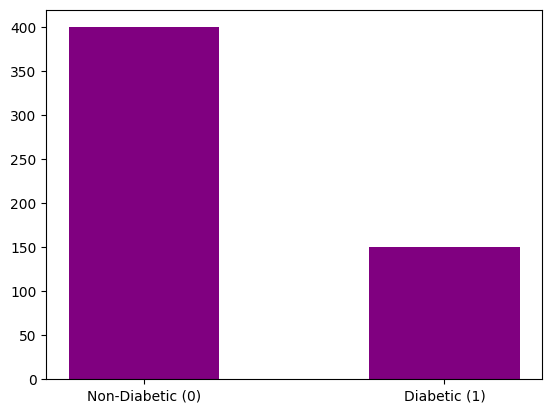

In [33]:
#Counting the frequencies:
diabetes_counts = dict(df_data["diabetes"].value_counts())

#Setting the classes:
classes = ["Non-Diabetic (0)", "Diabetic (1)"]

#Getting the values per class:
values = list(diabetes_counts.values())

#Making the plot:
fig = plt.bar(classes, values, color ='purple',  width = 0.5)

In [68]:
columns = ["gender", "age", "hypertension", "heart_disease", "bmi", "smoking_history"]

fig = make_subplots(rows=3, cols=2, start_cell="bottom-left")

nrows = 3
ncols = 2

# Iterate through columns in reverse order
for i in range(nrows):
    for j in range(ncols):
        col_index = (nrows - i - 1) * ncols + j  # Calculate the correct column index in reverse order
        if col_index < len(columns):
            column_name = columns[col_index]
            fig.add_trace(go.Histogram(x=df_data[column_name], name=column_name), row=i + 1, col=j + 1)


fig.show(renderer="colab")

### Supervised Learning (Classification)

Your task here is to build a classifier to differentiate potent compounds from less potent ones.

Use the code below to select the select specific columns for the basic features (**df_data**) and fingerprints (**df_fprs**)) datasets.

In [ ]:
target = 'potency_class'

# Basic features dataset
features = ["MolLogP", "Acceptor_Count", "Donor_Count", "NumRotatableBonds", \
           "RingCount", "MolWt"]

X = df_data[features]
y = df_data[target]

# What is the best TEST_SIZE?
TEST_SIZE = 0.26

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, \
                                                    random_state=42)

# Selecting same train and test entries in the Fingerprints dataset
X_train_fpr = df_fprs.iloc[X_train.index]
X_train_fpr = X_train_fpr.loc[:,38:63] # Selecting only a specific set of features/columns using indexes
X_test_fpr = df_fprs.iloc[X_test.index]
X_test_fpr = X_test_fpr.loc[:,38:63] # It needs to be the equal to the X_train_fpr

y_train_fpr = df_fprs.iloc[X_train.index][target]
y_test_fpr = df_fprs.iloc[X_test.index][target]

# print(y_train.value_counts())
utils.plot_train_test_class(y_train, y_test)

#### Why is data splitting necessary?

If you check in the code lines above you used a function "train_test_split". This function divided our data into two subsets. One part is used to evaluate or test the data and the other to train the model.

This is step is very important because it helps ensure the creation of data models and processes that use data models are accurate. Using the the test set (a subset completely unseen during trainning) you can estimate the performance of the model when it is applied to new data points.  

#### Decision Tree

Decision trees are composed of if/else questions disposed in a hierarchical manner, following these questions the model is capable of reaching a decision. In the case of our question, the actual output are 'less_potent' or 'potent' labels. The decision to reach prediction is based on the features (graph based signatures and auxiliary features) we used as input for the ML algorithm.

##### Training on the basic set of features

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
y_pred_train = cross_val_predict(clf, X_train, y_train, cv=5)

clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

utils.gen_train_test_cm(y_train, y_pred_train, y_test, y_pred_test, ['less_potent', 'potent'])

In [ ]:
utils.gen_train_test_roc(y_train, y_pred_train, y_test, y_pred_test, ['less_potent', 'potent'])

What does the decision tree looks like?

In [ ]:
fig, axes = plt.subplots(nrows=1 ,ncols=1, figsize=(9,6), dpi=300)
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['less_potent', 'potent'], filled=True)
plt.show()

Which features are more important for the model?

In [ ]:
utils.feat_importance(clf)

##### Training on the Fingerprint-based set of features

Performance on Training (k-fold cross validation)
              precision    recall  f1-score   support

 less_potent       0.57      0.43      0.49       357
      potent       0.69      0.80      0.74       562

    accuracy                           0.65       919
   macro avg       0.63      0.61      0.61       919
weighted avg       0.64      0.65      0.64       919

Performance on Test set
              precision    recall  f1-score   support

 less_potent       0.62      0.46      0.53       137
      potent       0.67      0.80      0.73       186

    accuracy                           0.65       323
   macro avg       0.65      0.63      0.63       323
weighted avg       0.65      0.65      0.64       323



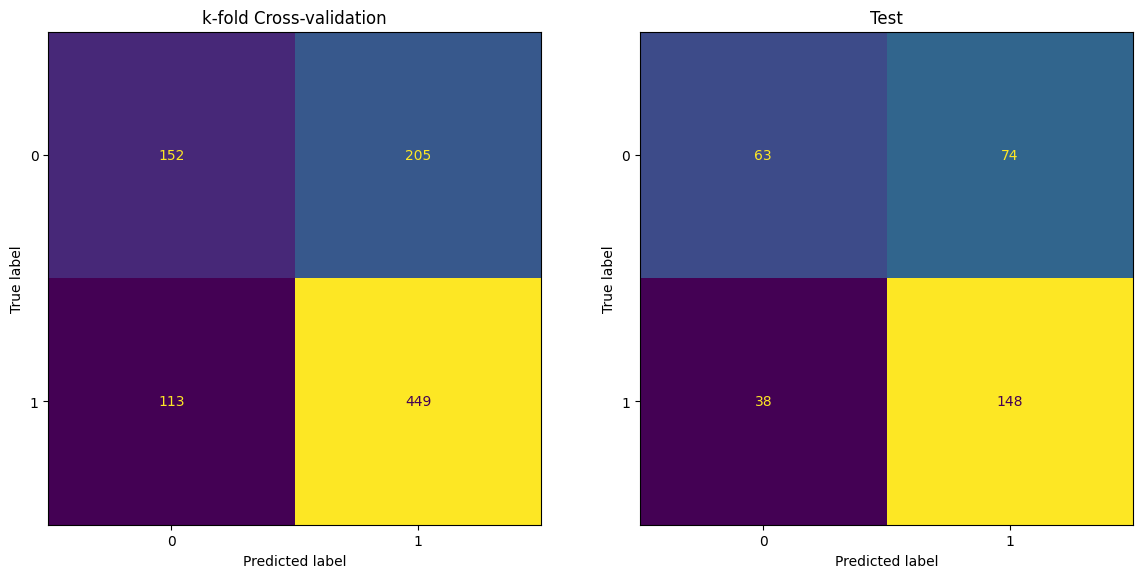

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
y_pred_train_fpr = cross_val_predict(clf, X_train_fpr, y_train_fpr, cv=5)

clf.fit(X_train_fpr, y_train_fpr)
y_pred_test_fpr = clf.predict(X_test_fpr)

utils.gen_train_test_cm(y_train_fpr, y_pred_train_fpr, y_test_fpr, y_pred_test_fpr, ['less_potent', 'potent'])

In [ ]:
utils.gen_train_test_roc(y_train_fpr, y_pred_train_fpr, y_test_fpr, y_pred_test_fpr, ['less_potent', 'potent'])

What does the decision tree looks like?

In [ ]:
fig, axes = plt.subplots(nrows=1 ,ncols=1, figsize=(9,6), dpi=300)
tree.plot_tree(clf, feature_names=X_train_fpr.columns, class_names=['less_potent', 'potent'], filled=True)
plt.show()

Which features are more important for the model?

In [ ]:
utils.feat_importance(clf)